---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [1]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
data=pd.read_csv('./AB_NYC_2019.csv')

### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
print('필드명 : ',data.columns)
print('필드개수 : ',len(data.columns))
print('데이터 개수 : ',data.shape[0])

필드명 :  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
필드개수 :  16
데이터 개수 :  48895


### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [6]:
data=data[pd.notnull(data['name'])]
data=data[pd.notnull(data['host_name'])]

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [7]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [8]:
price=visual_data['price']

In [9]:
quantile_95=price[price>=price.quantile(0.95)]
quantile_75=price[price>=price.quantile(0.75)]
quantile_50=price[price>=price.quantile(0.50)]
quantile_25=price[price>=price.quantile(0.25)]
quantile_5=price[price>=price.quantile(0.05)]

### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다. 

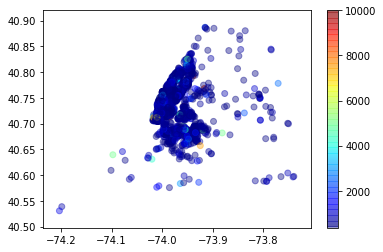

<Figure size 720x576 with 0 Axes>

In [10]:
price95=visual_data[price>=price.quantile(0.95)]

plt.scatter(price95['longitude'],
            price95['latitude'],
            c=price95['price'],
            alpha=0.4,
            cmap=plt.cm.jet
           )
plt.colorbar()
plt.figure(figsize=(10,8))

plt.show()

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

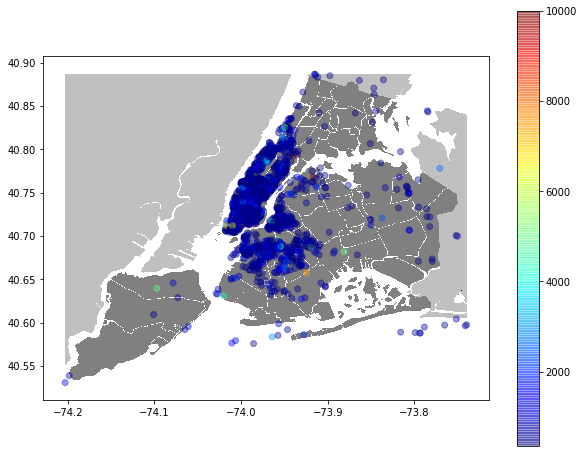

In [11]:

im = plt.imread('newyorkcity.png')
fig,ax=plt.subplots(figsize=[10,8]);
ax.imshow(im,extent=[
    min(price95['longitude']),
    max(price95['longitude']),
    min(price95['latitude']),
    max(price95['latitude'])]
          )

plt.scatter(price95['longitude'],
            price95['latitude'],
            c=price95['price'],
            alpha=0.4,
            cmap=plt.cm.jet,
           
           )
plt.colorbar()
plt.show()


In [184]:
max(price95['latitude']),len(price95['longitude'])

(40.88671, 2450)

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [3]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import re
analysis_data = data

# 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)
# 4번 예제
# pd.read_sql('select * from data', conn)

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8] re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터합니다. 

In [4]:
analysis_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
analysis_data=analysis_data[(analysis_data['name'].str.contains('[^a-zA-Z0-9\s\.\,\-\#]', regex=True))==False]

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [6]:

first1=analysis_data.groupby('room_type').get_group('Private room').sort_values('price',ascending=False)[['name','host_id','price']].iloc[0]
first2=analysis_data.groupby('room_type').get_group('Shared room').sort_values('price',ascending=False)[['name','host_id','price']].iloc[0]
first3=analysis_data.groupby('room_type').get_group('Entire home/apt').sort_values('price',ascending=False)[['name','host_id','price']].iloc[0]

print('Private room :\n',first1)
print('\nShared room : \n',first2)
print('\nEntire home/apt : \n',first3)

Private room :
 name       Furnished room in Astoria apartment
host_id                               20582832
price                                    10000
Name: 9151, dtype: object

Shared room : 
 name       Mins away to Manhattan Suite Residence
host_id                                  24146326
price                                        1800
Name: 14380, dtype: object

Entire home/apt : 
 name       1-BR Lincoln Center
host_id               72390391
price                    10000
Name: 29238, dtype: object


### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

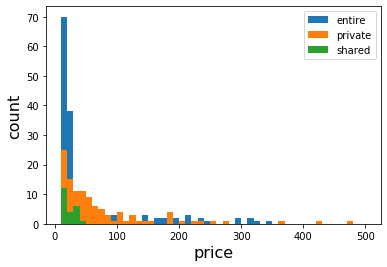

In [74]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np


private=analysis_data.groupby('room_type').get_group('Private room').sort_values('price')
shared=analysis_data.groupby('room_type').get_group('Shared room').sort_values('price')
entire=analysis_data.groupby('room_type').get_group('Entire home/apt').sort_values('price')

en=entire[entire['price']<=500]['price'].value_counts()
pr=private[private['price']<=500]['price'].value_counts()
sh=shared[shared['price']<=500]['price'].value_counts()

dic={'entire':en,'private':pr,'shared':sh}

DataFrame(dic).plot.hist(bins=range(10,501,10))

# plt.show()

# DataFrame(private[private['price']<=500]['price'].value_counts()).reset_index().set_index('price').plot.hist()
# DataFrame(shared[shared['price']<=500]['price'].value_counts()).reset_index().set_index('price').plot.hist()

# DataFrame(entire[entire['price']<=500]['price'].value_counts()).reset_index().set_index('price').plot.hist()
# # DataFrame(shared[shared['price']<=500]['price'].value_counts()).hist()
# # DataFrame(entire[entire['price']<=500]['price'].value_counts()).hist()
plt.xlabel('price',fontsize=16)
plt.ylabel('count',fontsize=16)

plt.show()


### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [100]:
import sqlite3 as sq

conn = sq.connect("airbnb.db")
data.to_sql('air', conn)



In [138]:
### 자료가져오기

df = pd.read_sql('''
                 select host_id
                 from air
                 group by host_id
                 ORDER BY count(*) DESC
                 Limit 10
                 ''', con = conn)
host_id=df['host_id']

for i in range(len(host_id)):
    priceList=pd.read_sql('''
                 select price
                 from air
                 where host_id='''+str(host_id[i]), con = conn)
    print('host id: ',host_id[i],' 평균',np.array(priceList).sum()/len(priceList))

host id:  219517861  평균 253.19571865443424
host id:  107434423  평균 303.1508620689655
host id:  30283594  평균 277.5289256198347
host id:  137358866  평균 43.8252427184466
host id:  16098958  평균 208.95833333333334
host id:  12243051  평균 213.03125
host id:  61391963  평균 146.24175824175825
host id:  22541573  평균 215.4367816091954
host id:  200380610  평균 290.2307692307692
host id:  7503643  평균 149.19230769230768
